# Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'BlackFridaySales.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.shape

(550068, 12)

In [6]:
#Checking Null values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# Null Value in percentage
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
#Unique elements in each attributes
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# EDA

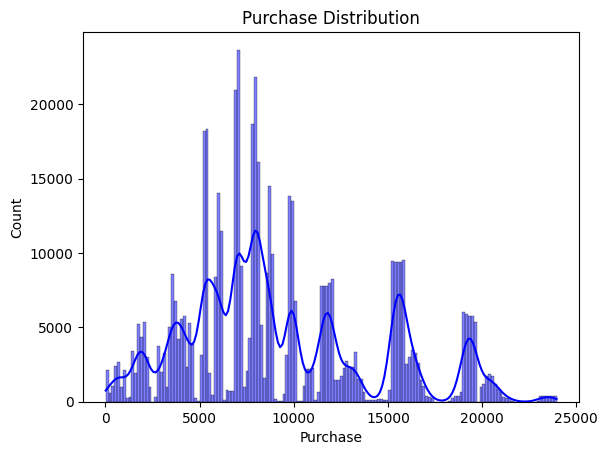

In [9]:
# Target Variable Purchase
sns.histplot(data["Purchase"], kde=True, color='b') 
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

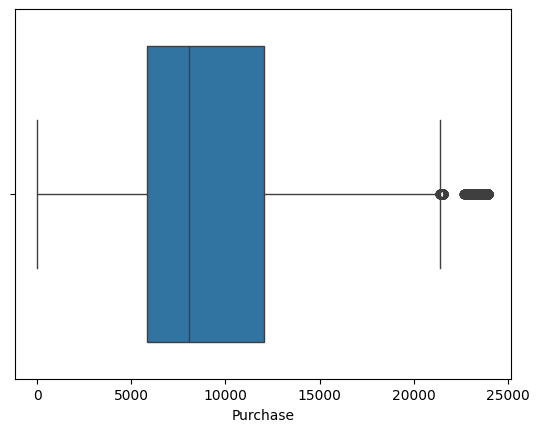

In [10]:
sns.boxplot(
    data=data,  
    x='Purchase'
)
plt.show()

In [11]:
data["Purchase"].skew()

0.6001400037087128

In [12]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [13]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

C:\Users\NILADRI DAS\AppData\Local\Temp\ipykernel_10048\380572766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


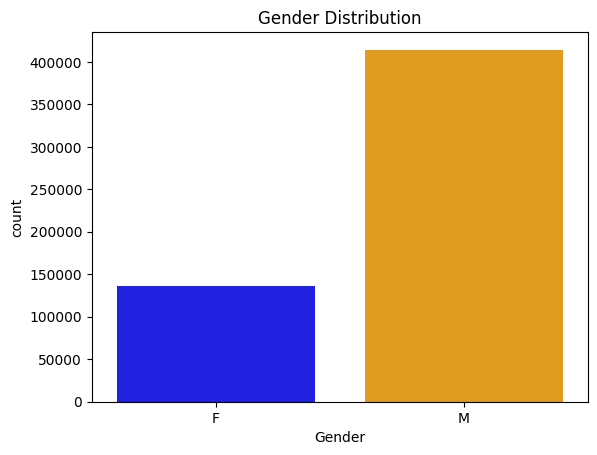

In [14]:
# Gender
sns.countplot(
    x=data['Gender'], 
    palette=['blue', 'orange'] 
)
plt.title("Gender Distribution")
plt.show()

In [15]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

# Marital Status

C:\Users\NILADRI DAS\AppData\Local\Temp\ipykernel_10048\3342745826.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


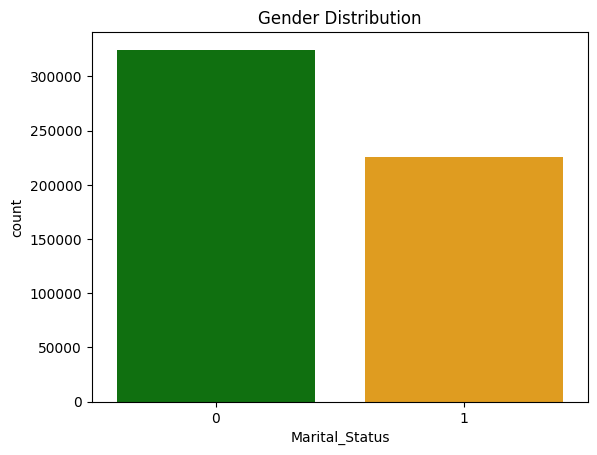

In [16]:

sns.countplot(
    x=data['Marital_Status'], 
    palette=['green', 'orange'] 
)
plt.title("Gender Distribution")
plt.show()

There are more unmarried people in the dataset who purchase more

In [17]:
data.groupby("Marital_Status", observed=True).mean(numeric_only=True)["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

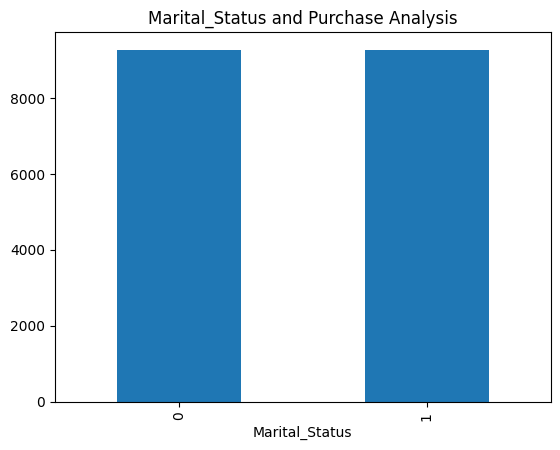

In [18]:
data.groupby("Marital_Status", observed=True).mean(numeric_only=True)["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

# Occupation

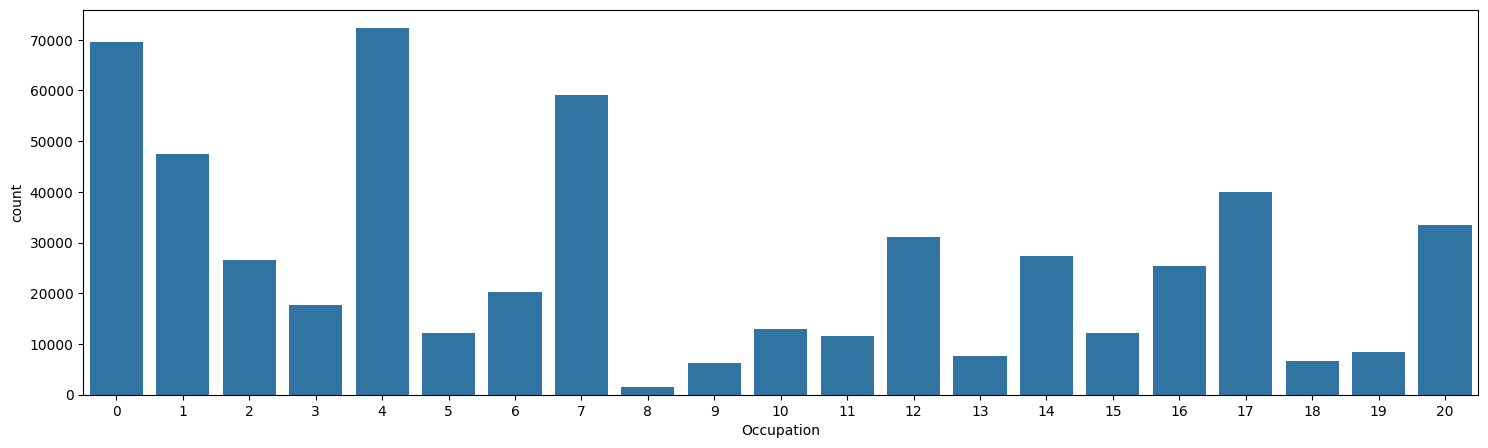

In [19]:
plt.figure(figsize=(18, 5))  
sns.countplot(
    data=data,  
    x='Occupation'
)
plt.show()

In [20]:
occup = pd.DataFrame(data.groupby("Occupation", observed=True).mean(numeric_only=True)["Purchase"])
occup.head()         

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251


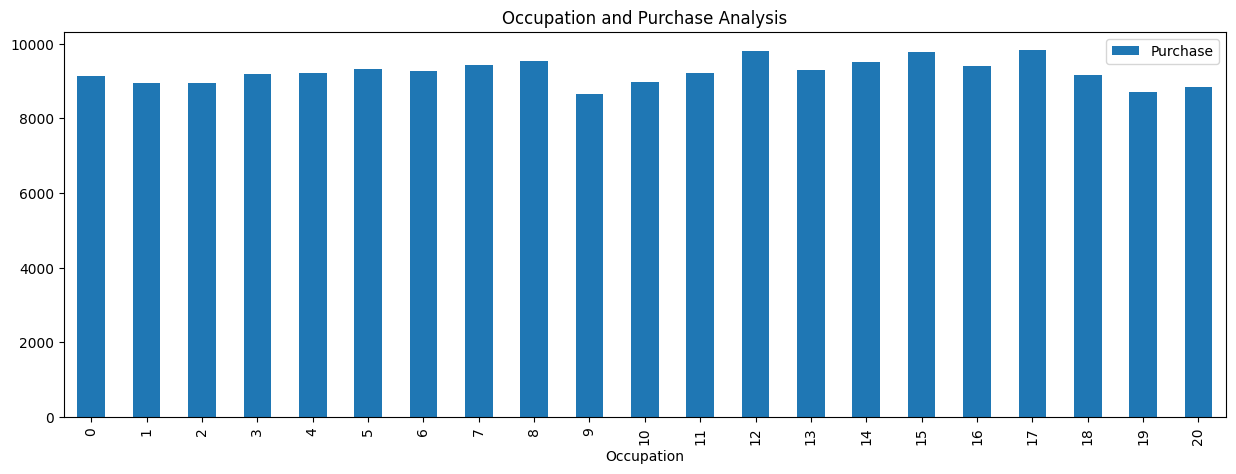

In [21]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# City_Category

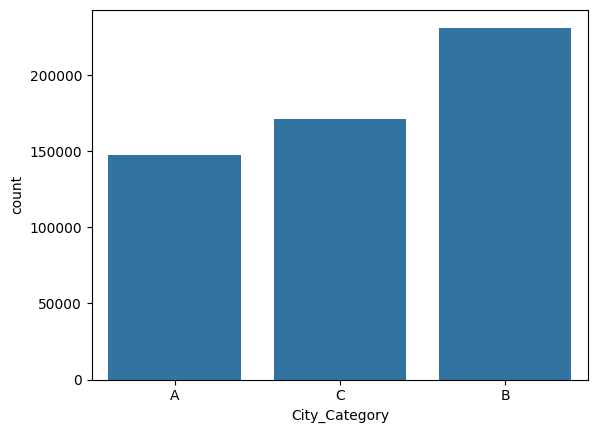

In [22]:
sns.countplot(
    data=data,  
    x='City_Category'
)
plt.show()

It is observed that city category B has made the most number of puchases.

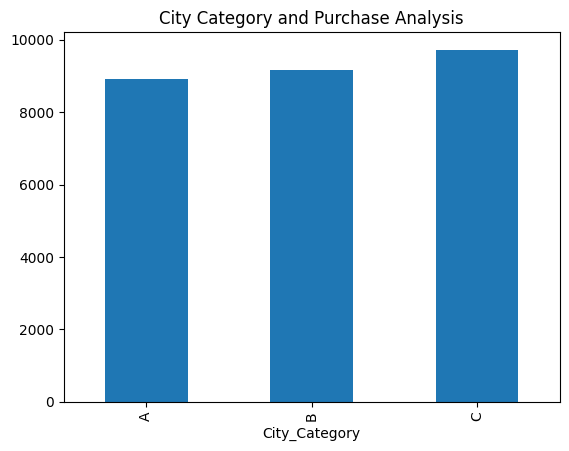

In [23]:
data.groupby("City_Category", observed=True).mean(numeric_only=True)["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

# Stay_In_Current_City_Years

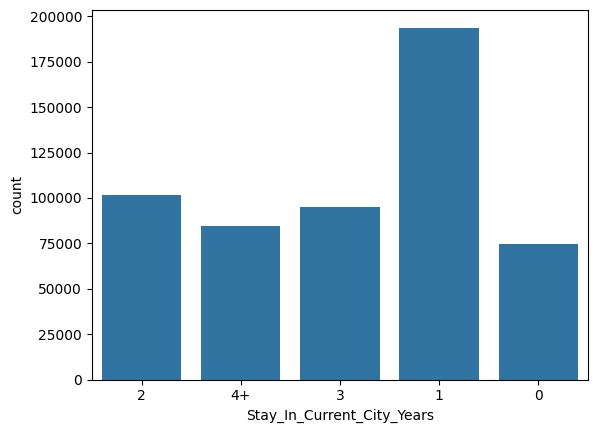

In [24]:
sns.countplot(
    data=data,  
    x='Stay_In_Current_City_Years'
)
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

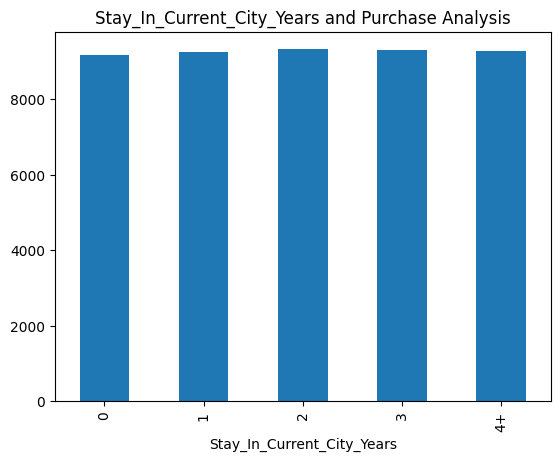

In [25]:
data.groupby("Stay_In_Current_City_Years", observed=True).mean(numeric_only=True)["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

# Age

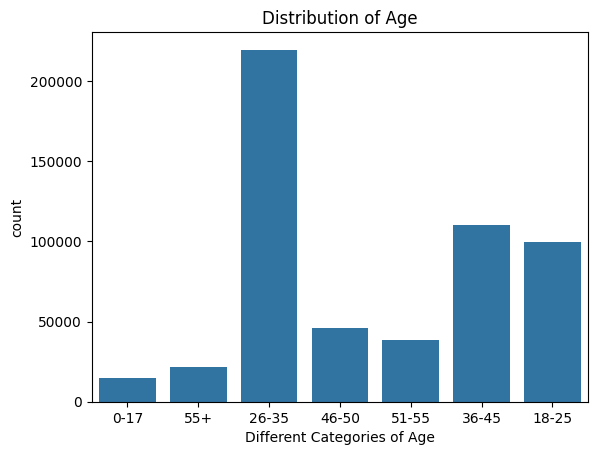

In [26]:
sns.countplot(data = data, x ='Age')
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

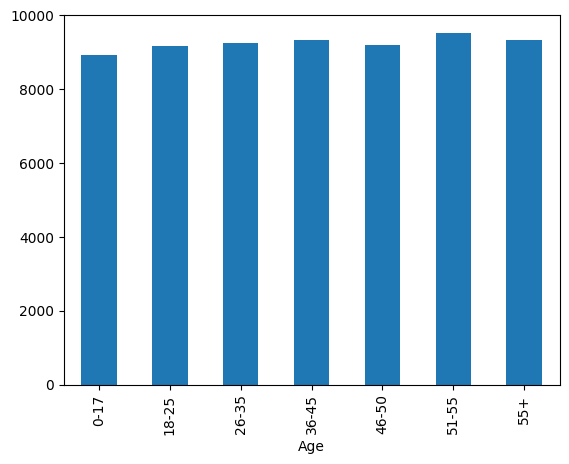

In [27]:
data.groupby("Age", observed = True).mean(numeric_only = True)["Purchase"].plot(kind='bar')
plt.show()

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

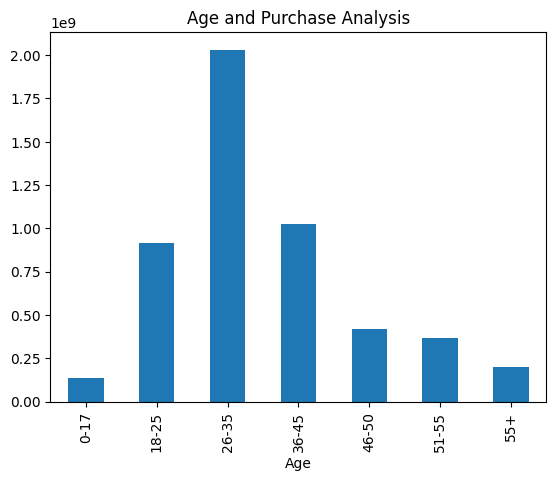

In [28]:
data.groupby("Age", observed = True).sum(numeric_only = True)['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

# Product_Category_1

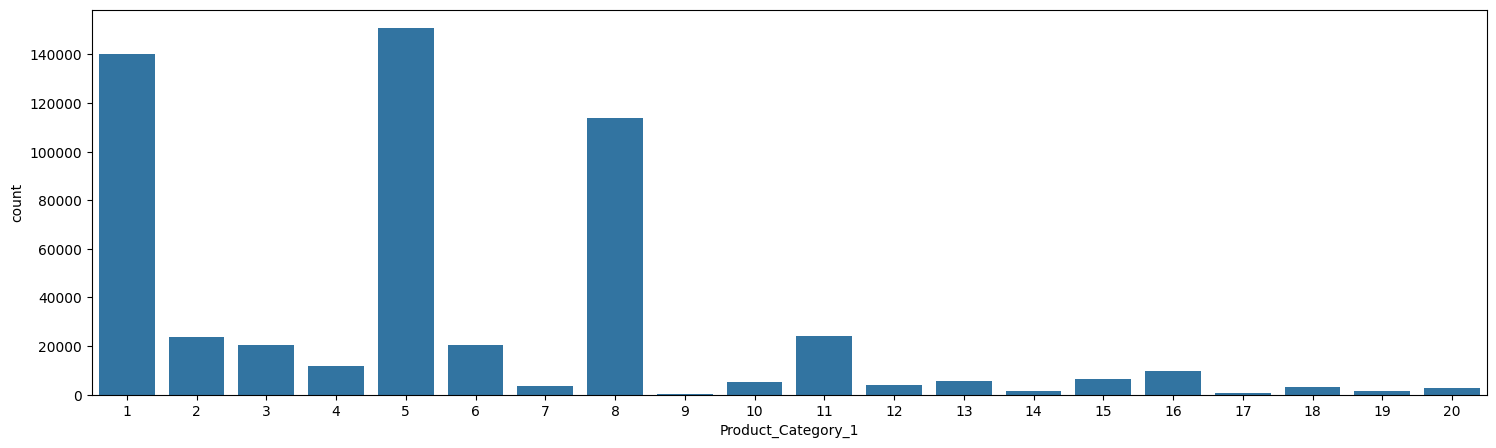

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(data = data, x = 'Product_Category_1')
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

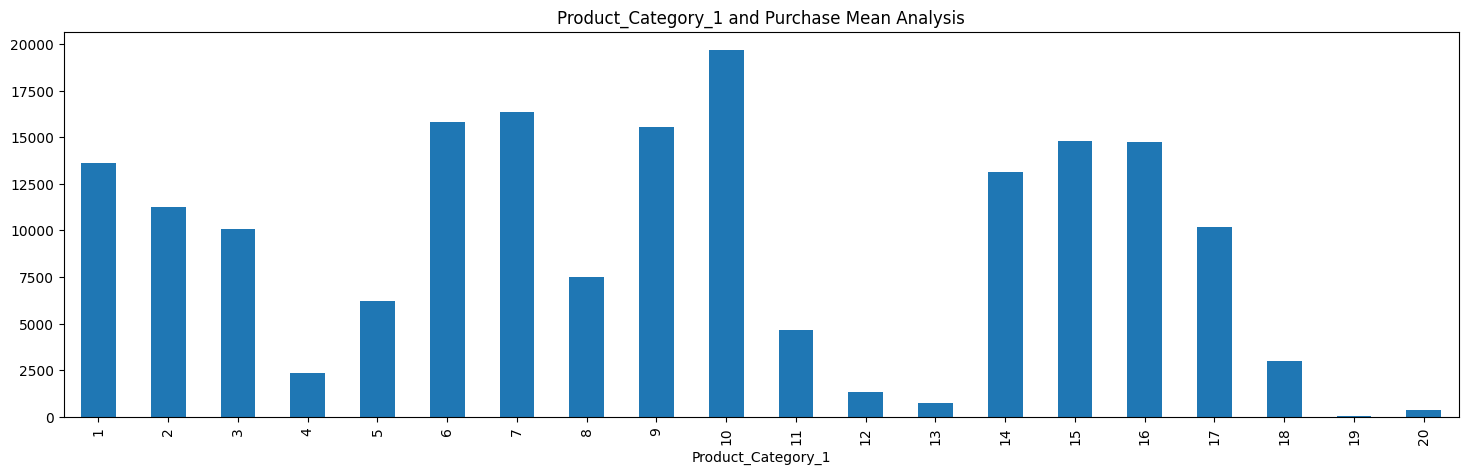

In [30]:
data.groupby('Product_Category_1', observed = True).mean(numeric_only = True)['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

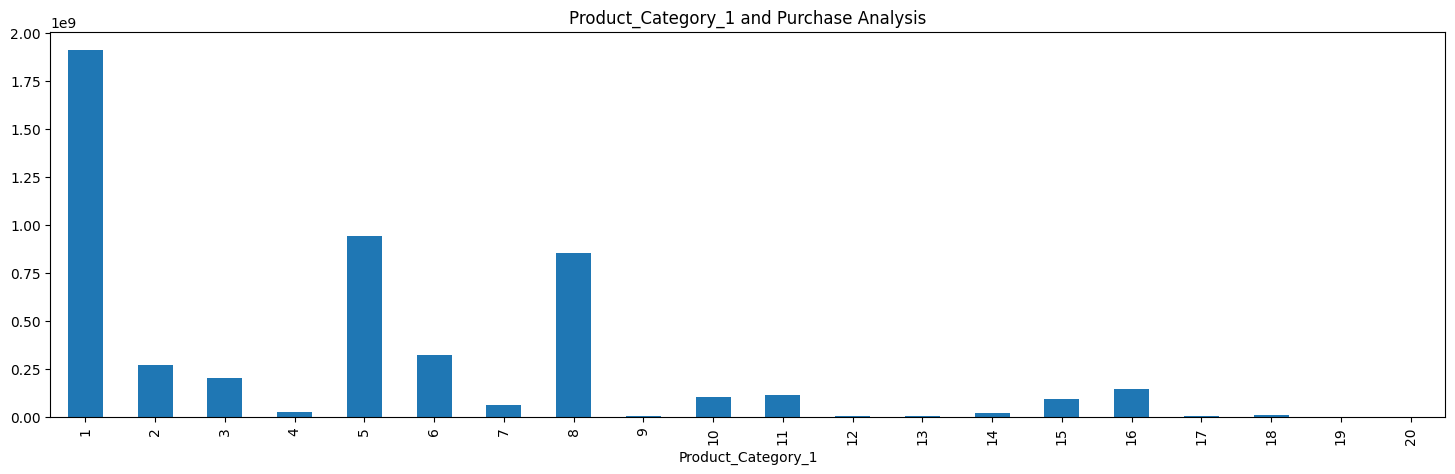

In [31]:
data.groupby('Product_Category_1', observed = True).sum(numeric_only = True)['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

# Product_Category_2

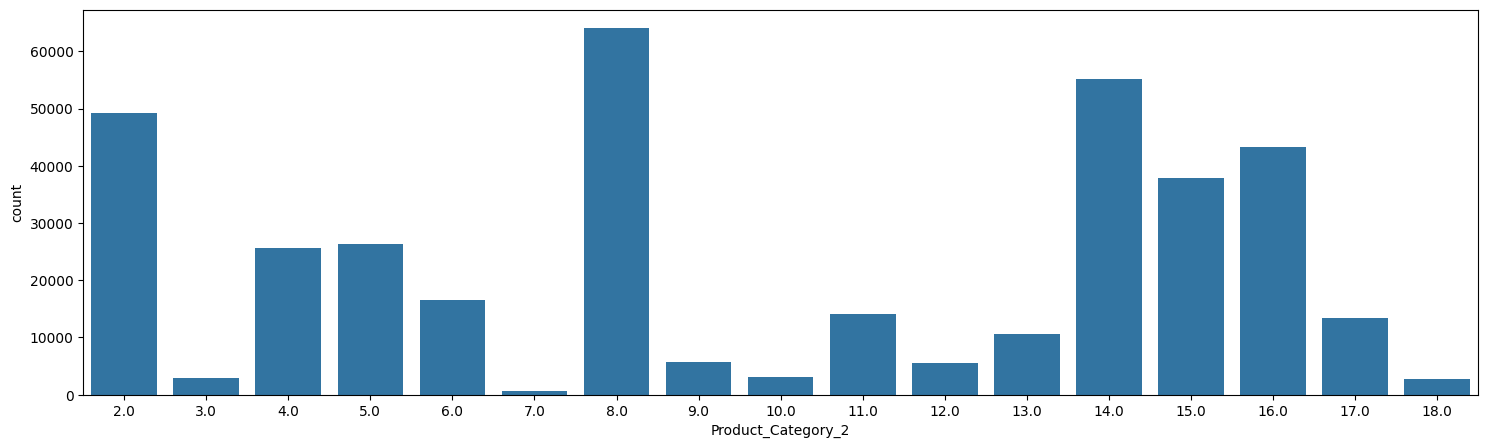

In [32]:
plt.figure(figsize=(18,5))
sns.countplot(data = data, x = 'Product_Category_2')
plt.show()

# Product_Category_3

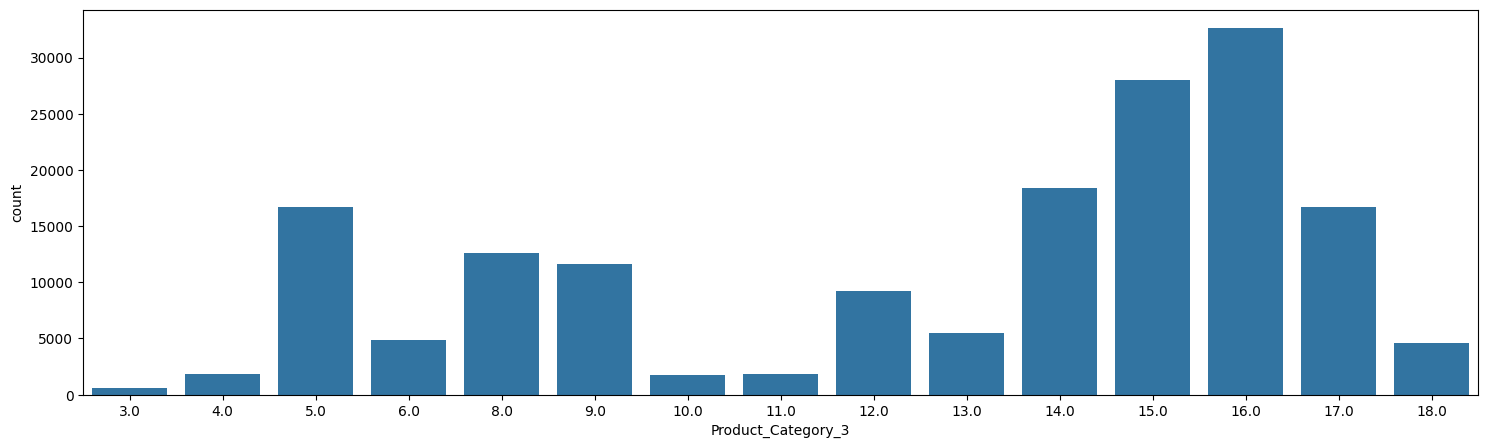

In [33]:
plt.figure(figsize=(18,5))
sns.countplot(data = data, x = 'Product_Category_3')
plt.show()

In [34]:
correlation = data.corr(numeric_only = True)
correlation

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


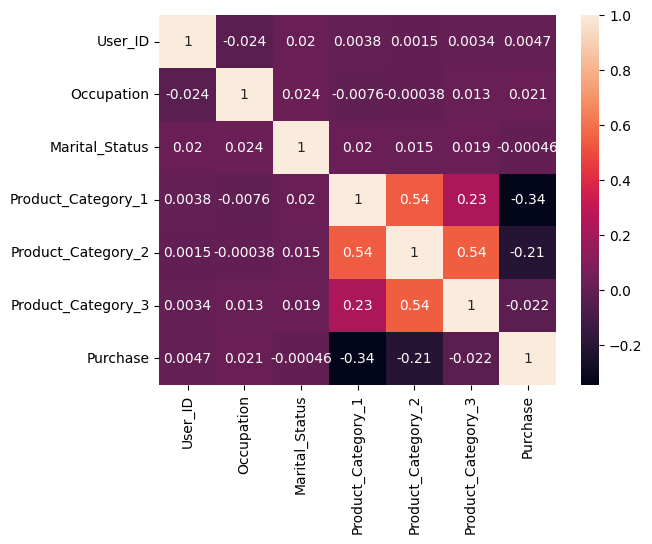

In [35]:
sns.heatmap(correlation,annot=True)
plt.show()

In [36]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [37]:
df = data.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])


# Encoding the categorical variables

In [39]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [40]:
gender_encoder = LabelEncoder()
age_encoder = LabelEncoder()
city_encoder = LabelEncoder()

df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['Age'] = age_encoder.fit_transform(df['Age'])
df['City_Category'] = city_encoder.fit_transform(df['City_Category'])

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [42]:
df.isnull().sum()

User_ID                               0
Product_ID                            0
Gender                                0
Age                                   0
Occupation                            0
City_Category                         0
Marital_Status                        0
Product_Category_1                    0
Product_Category_2               173638
Product_Category_3               383247
Purchase                              0
Stay_In_Current_City_Years_0          0
Stay_In_Current_City_Years_1          0
Stay_In_Current_City_Years_2          0
Stay_In_Current_City_Years_3          0
Stay_In_Current_City_Years_4+         0
dtype: int64

In [43]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [44]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [46]:
# Dropping the irrelevant columns
df = df.drop(["User_ID","Product_ID"],axis=1)

# Splitting data into independent and dependent variables


In [47]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
lr.intercept_

9553.400608220703

In [52]:
lr.coef_

array([ 466.19430146,  102.91336676,    5.39090549,  316.90666535,
        -54.11888607, -350.22733451,   13.38566933,  143.43685071,
        -24.7619124 ,    1.24554903,    7.19871684,   -3.59412918,
         19.91177571])

In [53]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [55]:
mean_absolute_error(y_test, y_pred)

3529.250883690224

In [56]:
mean_squared_error(y_test, y_pred)

21416033.8931943

In [57]:
r2_score(y_test, y_pred)

0.15023410672791626

In [58]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4627.746092126738


## DecisionTreeRegressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 42)  

In [60]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
dt_y_pred = regressor.predict(X_test)

In [62]:
mean_absolute_error(y_test, dt_y_pred)

2380.7551931658963

In [63]:
mean_squared_error(y_test, dt_y_pred)

11400718.099066967

In [64]:
r2_score(y_test, dt_y_pred)

0.5476313939493932

In [65]:
from math import sqrt
print("RMSE of DecisionTree Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of DecisionTree Regression Model is  3376.4949428463487


## Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 42)  

In [67]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
rf_y_pred = RFregressor.predict(X_test)

In [69]:
mean_absolute_error(y_test, rf_y_pred)

2227.609512376818

In [70]:
mean_squared_error(y_test, rf_y_pred)

9374576.673660439

In [71]:
r2_score(y_test, rf_y_pred)

0.628026572946719

In [72]:
from math import sqrt
print("RMSE of RandomForest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of RandomForest Regression Model is  3061.7930487968056


## XGBoost Regressor

In [76]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
import xgboost as xgb
print(f"XGBoost version: {xgb.__version__}")
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")

XGBoost version: 2.1.3
Scikit-learn version: 1.6.1


In [90]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [91]:

xgb_reg.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
xgb_y_pred = xgb_reg.predict(X_test)

In [93]:
mean_absolute_error(y_test, xgb_y_pred)

2147.51171875

In [94]:
mean_squared_error(y_test, xgb_y_pred)

8310601.5

In [95]:
r2_score(y_test, xgb_y_pred)

0.6702439785003662

In [96]:
from math import sqrt
print("RMSE of XGB Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGB Regression Model is  2882.811388211168


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2882